In [204]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [205]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos del TP de CMI

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.
1. **Optimo**

# Métodos
Los métodos evaluados en este notebook son los siguientes:
- **GS**: Goloso secuencial.
- **GE**: Goloso expansivo.
- **GB**: Goloso Bruteforcer.
- **TS**: Tabu search.

# Experimentos
Leemos el dataframe con todos los resultados.

In [206]:
df_resultados = pd.read_csv("..\\results\\resultado.csv");
df_resultados = df_resultados[df_resultados["metodo"]=="TS"].copy()

In [207]:
agg_funcs = {   "tiempo":"mean",
                "impacto":"mean",
                "cant_colores": "mean",
                "longitud_tabu": "mean",
                "tipo_memoria": "first",
                "porcentaje_vecindad": "mean",
                "tiempo_mejor_solucion": "mean"}
df_resultados = df_resultados.groupby(['dataset','n','mG','mH','goloso_inicial']).aggregate(agg_funcs).reset_index()

In [208]:
def distancias_relativas(dataset):

    df_dataset = df_resultados[(df_resultados["dataset"] == dataset)].copy().reset_index();
    df_dataset.head()
    agg_funcs = {   "tiempo":"mean",
                    "impacto":"max",
                    "cant_colores": "mean",
                    "longitud_tabu": "mean",
                    "tipo_memoria": "first",
                    "porcentaje_vecindad": "mean",
                    "tiempo_mejor_solucion": "mean"}
    df_dataset_max = df_dataset.groupby(['dataset','n','mG','mH']).aggregate(agg_funcs).reset_index()
    df_dataset_max = df_dataset_max.append([df_dataset_max]*2,ignore_index=True)
    df_dataset_max = df_dataset_max.sort_values('n').reset_index()
    df_dataset['max'] = df_dataset_max['impacto']
    #df_dataset.apply(lambda r: (r['max']-r['impacto'])/r['max'], axis=1)
    df_dataset['diff_relativa'] = df_dataset.apply(lambda r: (r['max']-r['impacto'])/r['max'], axis=1)
  
    return df_dataset

In [209]:
def dataplot(df,column):

    plt.figure(figsize=(20, 20))
    plotdata = pd.DataFrame({
        "GS":df[df['goloso_inicial']=="GS"][column].tolist(),
        "GE":df[df['goloso_inicial']=="GE"][column].tolist(),
        "GB":df[df['goloso_inicial']=="GB"][column].tolist()
        }, 
        index=df['n'].drop_duplicates().tolist()
    )
    return plotdata

In [210]:
datasets = [
    "random-denso-denso-25",
    "random-denso-denso-75",
    "random-denso-ralo-25",
    "random-denso-ralo-75",
    "random-ralo-denso-25",
    "random-ralo-denso-75",
    "random-ralo-ralo-25",
    "random-ralo-ralo-75"
]

df_datasets = {}
for dataset in datasets: 
    df_datasets[dataset] = distancias_relativas(dataset)
df_datasets["random-denso-denso-25"]

,index,dataset,n,mG,mH,goloso_inicial,tiempo,impacto,cant_colores,longitud_tabu,tipo_memoria,porcentaje_vecindad,tiempo_mejor_solucion,max,diff_relativa
0,0,random-denso-denso-25,10,22,22,GB,14334.333333,7.666667,4.666667,10,soluciones,10,5.361106e+14,7.666667,0.000000
1,1,random-denso-denso-25,10,22,22,GE,13333.666667,7.333333,4.666667,10,soluciones,10,1.072221e+15,7.666667,0.043478
2,2,random-denso-denso-25,10,22,22,GS,14001.000000,7.333333,4.666667,10,soluciones,10,1.072221e+15,7.666667,0.043478
3,3,random-denso-denso-25,20,95,95,GB,86338.333333,24.333333,7.333333,10,soluciones,10,1.608332e+15,24.333333,0.000000
4,4,random-denso-denso-25,20,95,95,GE,69670.666667,22.333333,6.666667,10,soluciones,10,1.608332e+15,24.333333,0.082192
5,5,random-denso-denso-25,20,95,95,GS,70671.000000,23.666667,7.000000,10,soluciones,10,1.608332e+15,24.333333,0.027397
6,6,random-denso-denso-25,30,217,217,GB,327019.000000,45.000000,8.000000,10,soluciones,10,1.608332e+15,45.000000,0.000000
7,7,random-denso-denso-25,30,217,217,GE,226013.000000,41.000000,9.000000,10,soluciones,10,1.608332e+15,45.000000,0.088889
8,8,random-denso-denso-25,30,217,217,GS,222013.000000,41.000000,8.000000,10,soluciones,10,0.000000e+00,45.000000,0.088889


In [211]:
#promedio diferencias relativas
def promedioRelativo(df,column):
    agg_funcs = {"dataset":"first",
                 column:"mean"}
    prom_dist_rel = df.groupby(['goloso_inicial']).aggregate(agg_funcs).reset_index()
    return prom_dist_rel

In [212]:
def dataplotDiffs(df,column):

    plt.figure(figsize=(20, 20))
    plotdata = pd.DataFrame({
        "GS":df[df['goloso_inicial']=="GS"][column].tolist(),
        "GE":df[df['goloso_inicial']=="GE"][column].tolist(),
        "GB":df[df['goloso_inicial']=="GB"][column].tolist()
        }, 
        index=df['dataset'].drop_duplicates().tolist()
    )
    return plotdata

<Figure size 1440x1440 with 0 Axes>

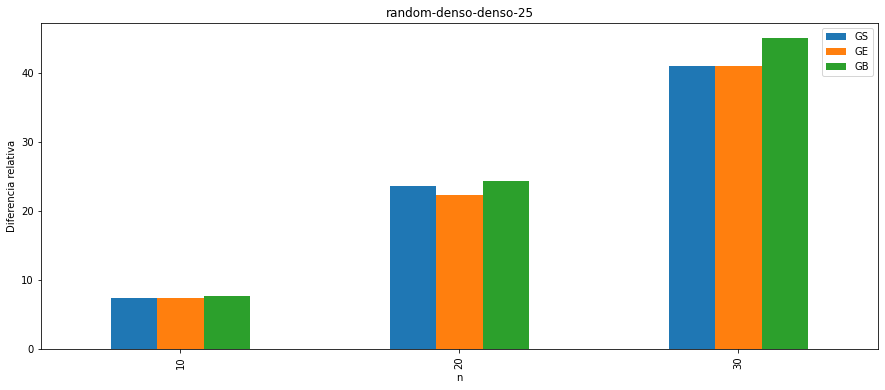

<Figure size 1440x1440 with 0 Axes>

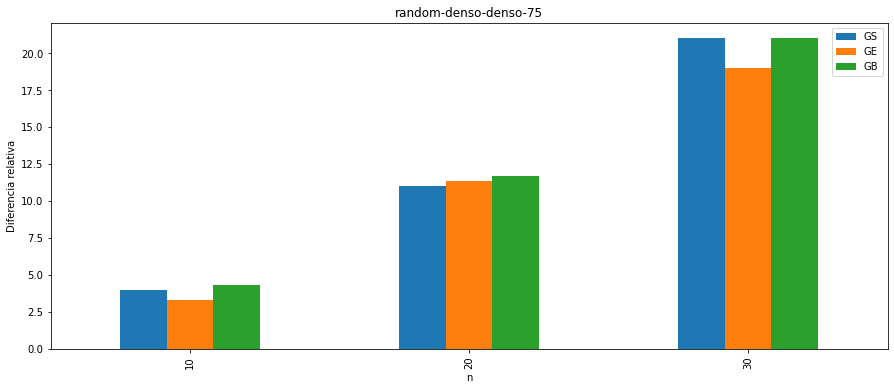

<Figure size 1440x1440 with 0 Axes>

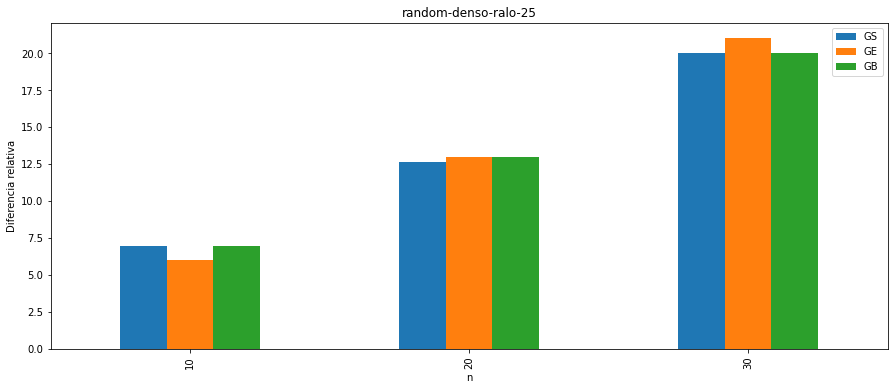

<Figure size 1440x1440 with 0 Axes>

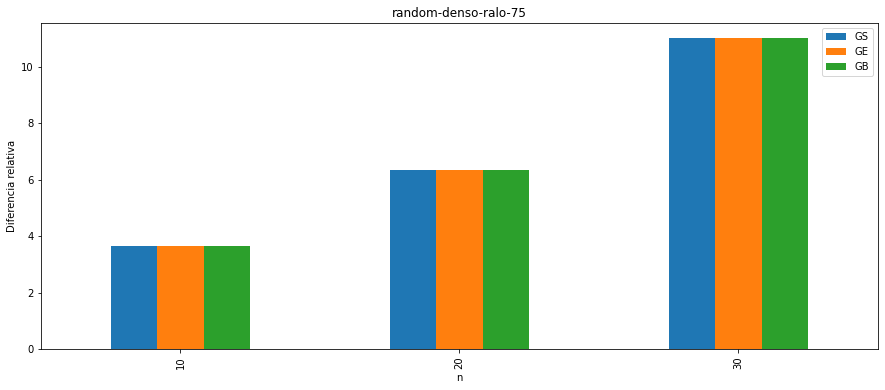

<Figure size 1440x1440 with 0 Axes>

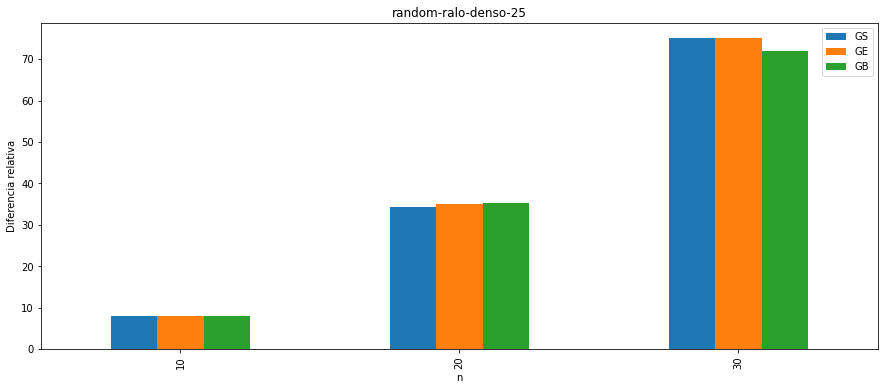

<Figure size 1440x1440 with 0 Axes>

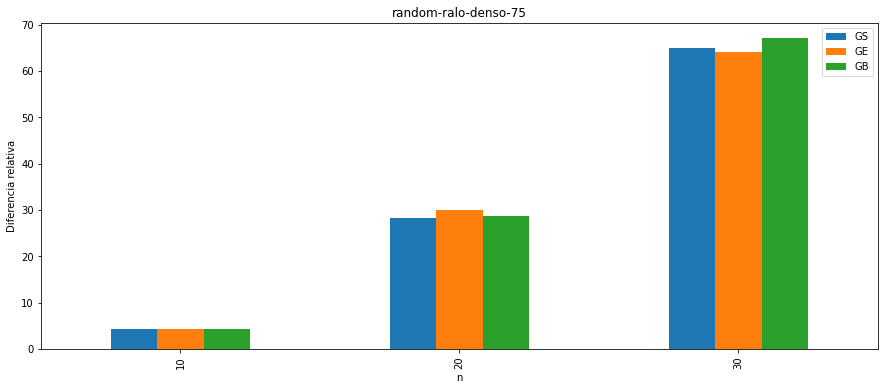

<Figure size 1440x1440 with 0 Axes>

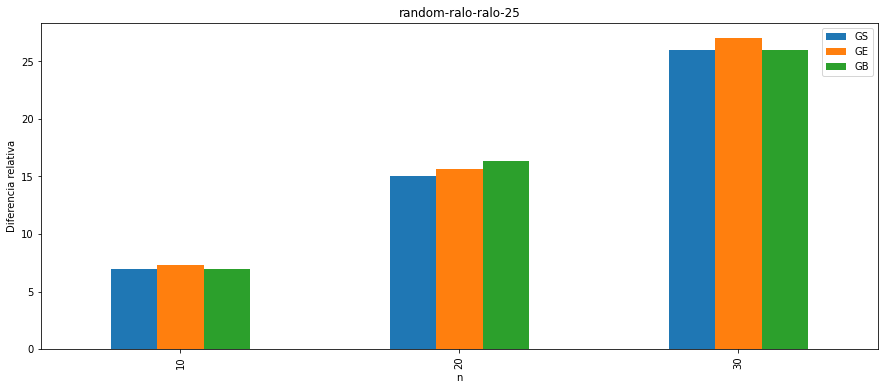

<Figure size 1440x1440 with 0 Axes>

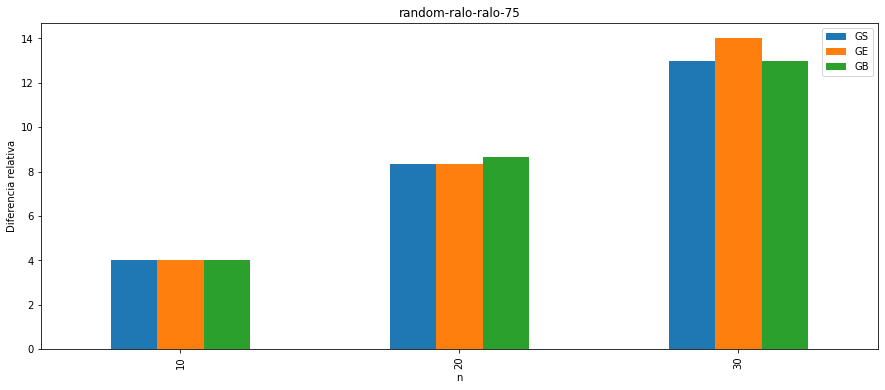

In [213]:
df = pd.DataFrame()
for dataset in datasets: 
    plotdata = dataplot(df_datasets[dataset],"impacto")
    ax = plotdata.plot(kind="bar", figsize=(15,6))
    ax.set_title(dataset)
    ax.set_xlabel('n')
    ax.set_ylabel('Diferencia relativa')
    plt.savefig("..\\graficos\\" + dataset + "-relativo.svg");
    prom = promedioRelativo(df_datasets[dataset],"impacto")
    #print(prom.to_latex(index=False))
    df = df.append(prom)

<Figure size 1440x1440 with 0 Axes>

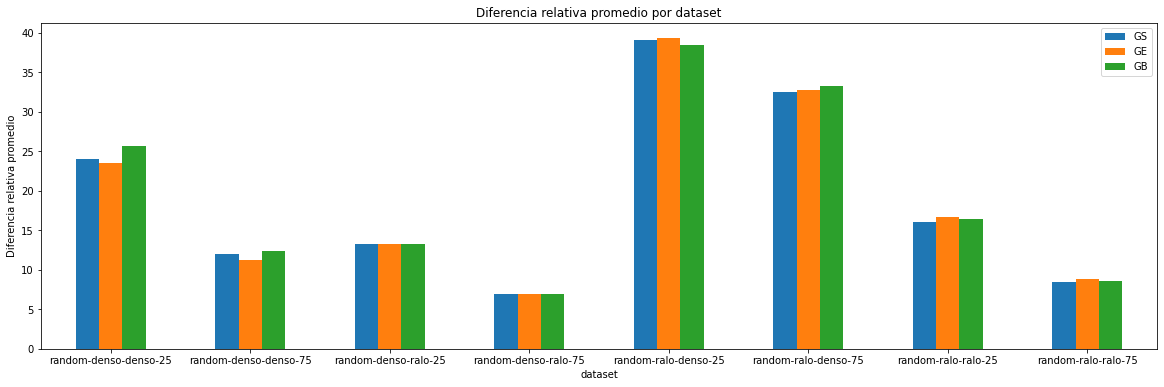

In [214]:
plotdata = dataplotDiffs(df,"impacto")
ax = plotdata.plot(kind="bar", figsize=(20,6), rot=0)
ax.set_title("Diferencia relativa promedio por dataset")
ax.set_xlabel('dataset')
ax.set_ylabel('Diferencia relativa promedio')
plt.savefig("..\\graficos\\" + "diff-promedios" + "-relativo.svg");

<Figure size 1440x1440 with 0 Axes>

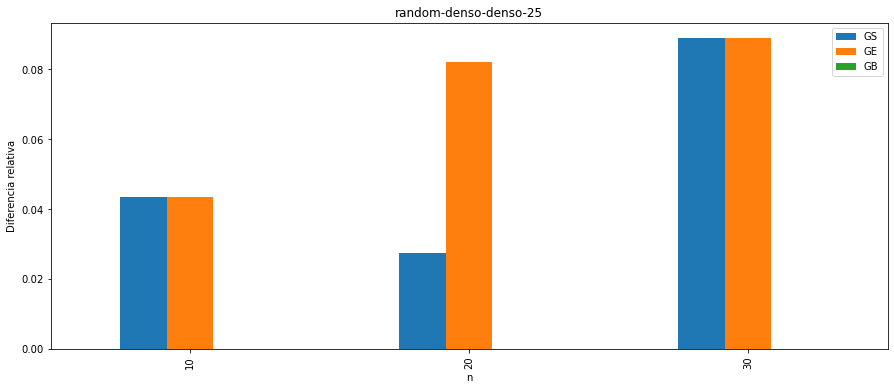

<Figure size 1440x1440 with 0 Axes>

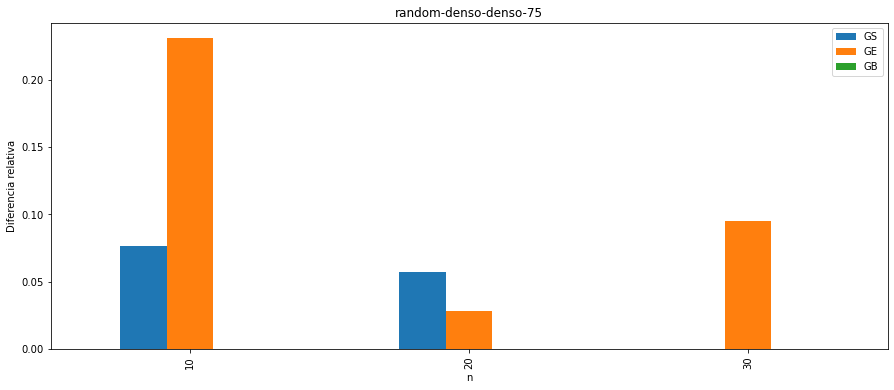

<Figure size 1440x1440 with 0 Axes>

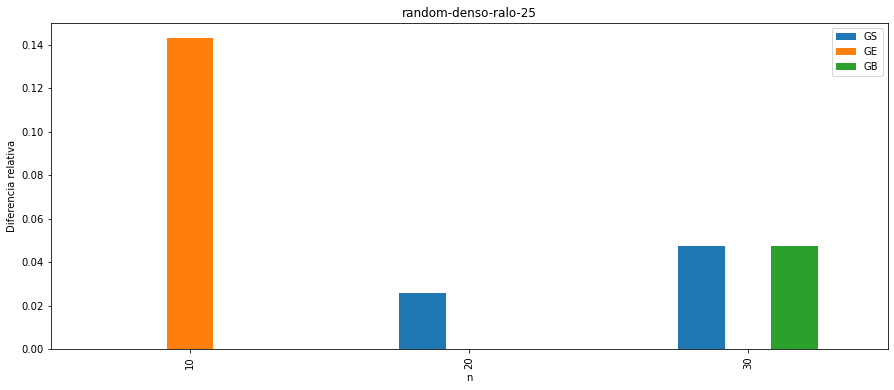

<Figure size 1440x1440 with 0 Axes>

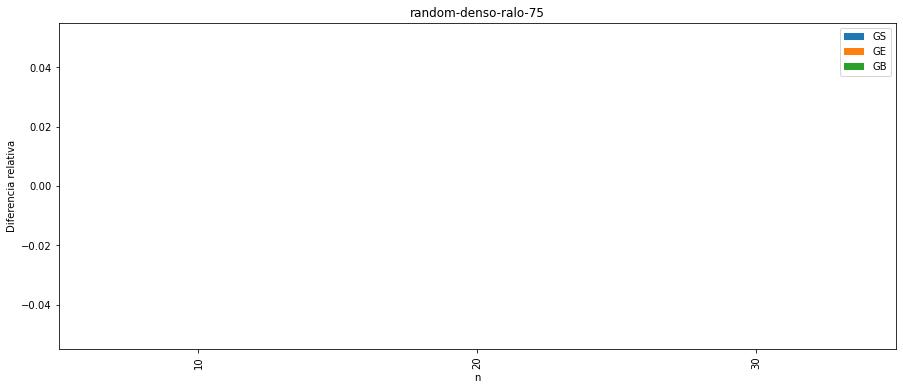

<Figure size 1440x1440 with 0 Axes>

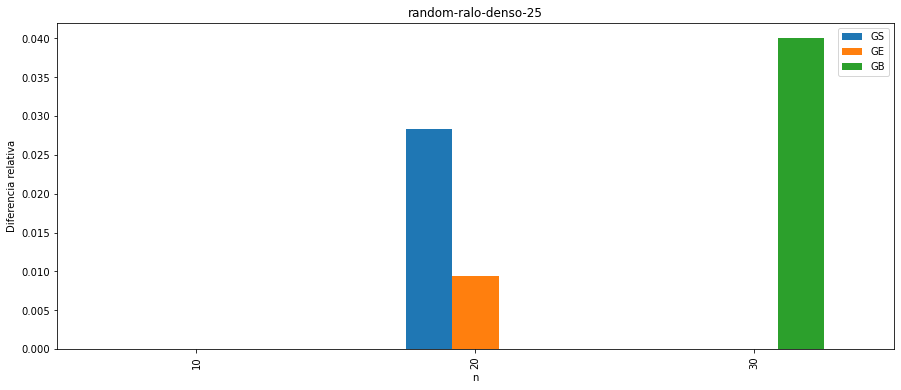

<Figure size 1440x1440 with 0 Axes>

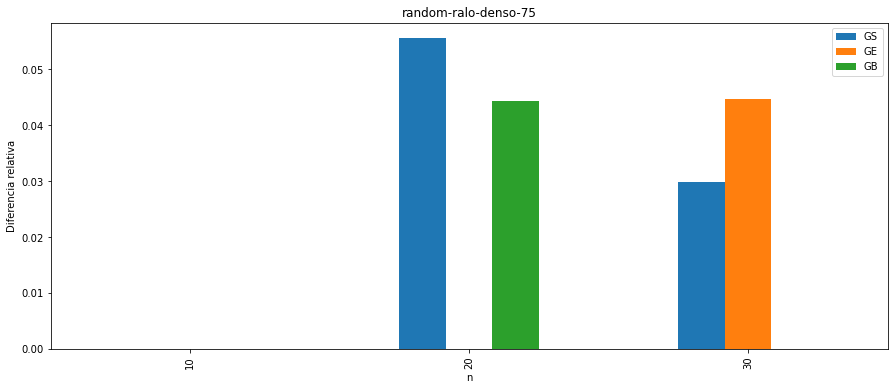

<Figure size 1440x1440 with 0 Axes>

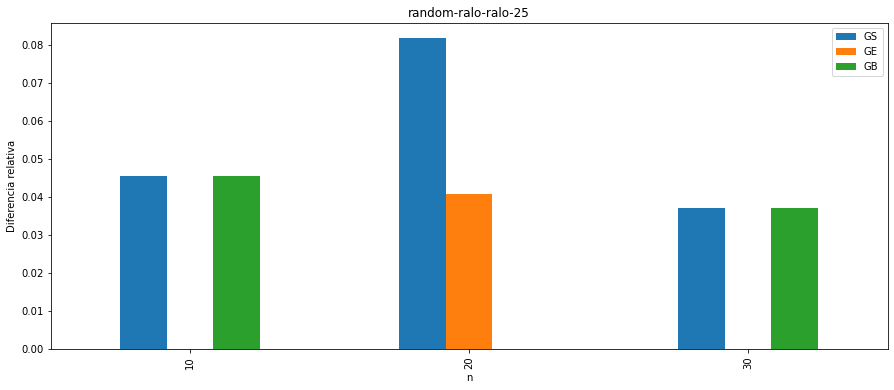

<Figure size 1440x1440 with 0 Axes>

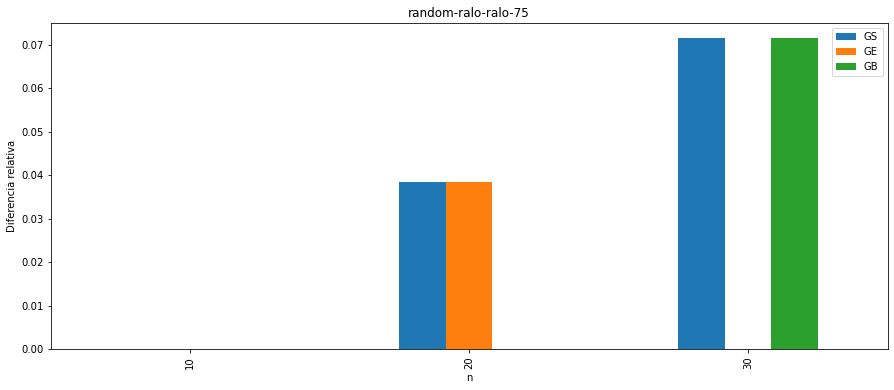

In [215]:
df = pd.DataFrame()
for dataset in datasets: 
    plotdata = dataplot(df_datasets[dataset],"diff_relativa")
    ax = plotdata.plot(kind="bar", figsize=(15,6))
    ax.set_title(dataset)
    ax.set_xlabel('n')
    ax.set_ylabel('Diferencia relativa')
    plt.savefig("..\\graficos\\" + dataset + "-relativo.svg");
    prom = promedioRelativo(df_datasets[dataset],"diff_relativa")
    #print(prom.to_latex(index=False))
    df = df.append(prom)

<Figure size 1440x1440 with 0 Axes>

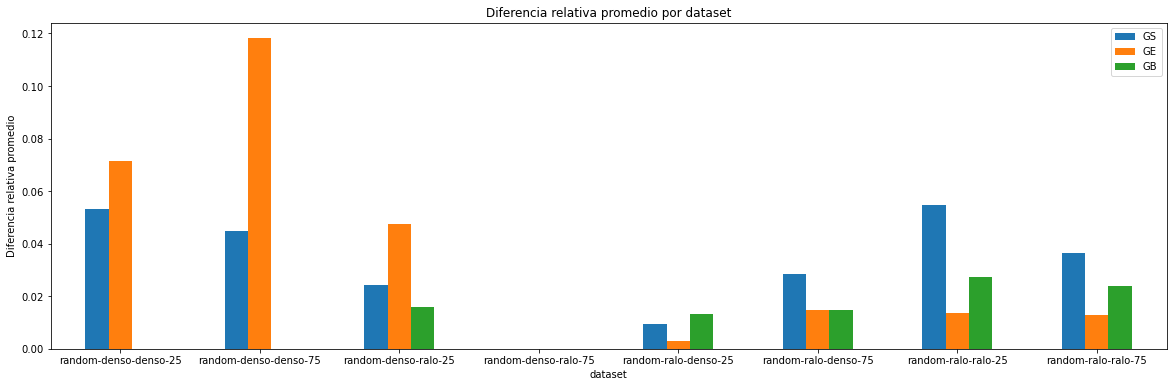

In [216]:
plotdata = dataplotDiffs(df,"diff_relativa")
ax = plotdata.plot(kind="bar", figsize=(20,6), rot=0)
ax.set_title("Diferencia relativa promedio por dataset")
ax.set_xlabel('dataset')
ax.set_ylabel('Diferencia relativa promedio')
plt.savefig("..\\graficos\\" + "diff-promedios" + "-relativo.svg");

<Figure size 1440x1440 with 0 Axes>

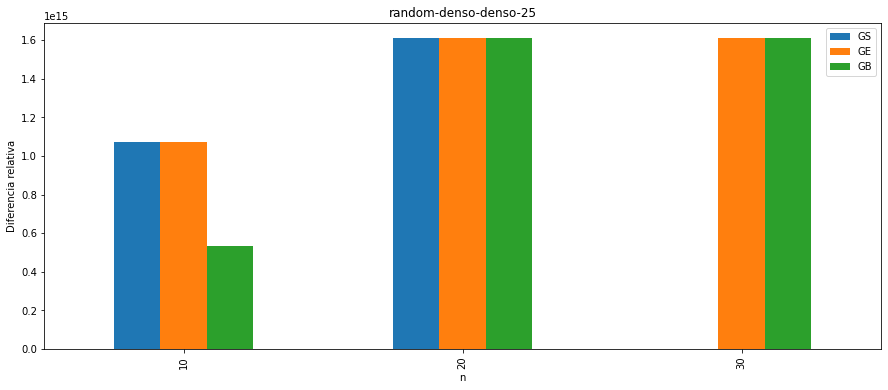

<Figure size 1440x1440 with 0 Axes>

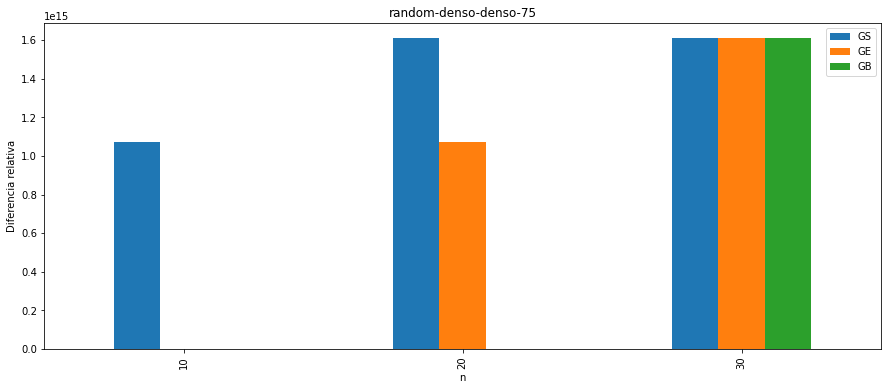

<Figure size 1440x1440 with 0 Axes>

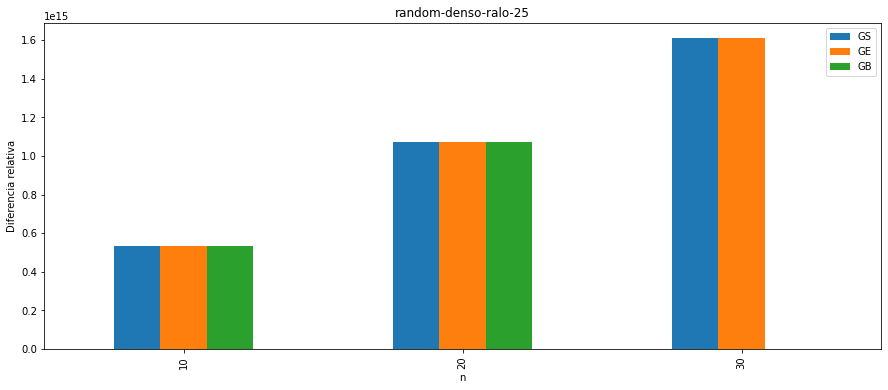

<Figure size 1440x1440 with 0 Axes>

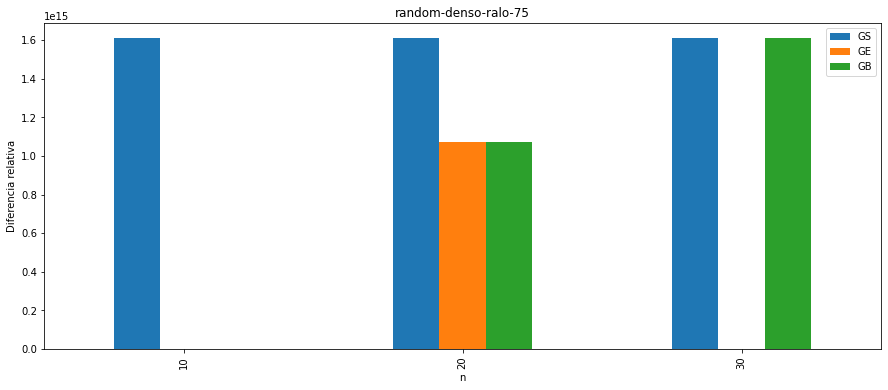

<Figure size 1440x1440 with 0 Axes>

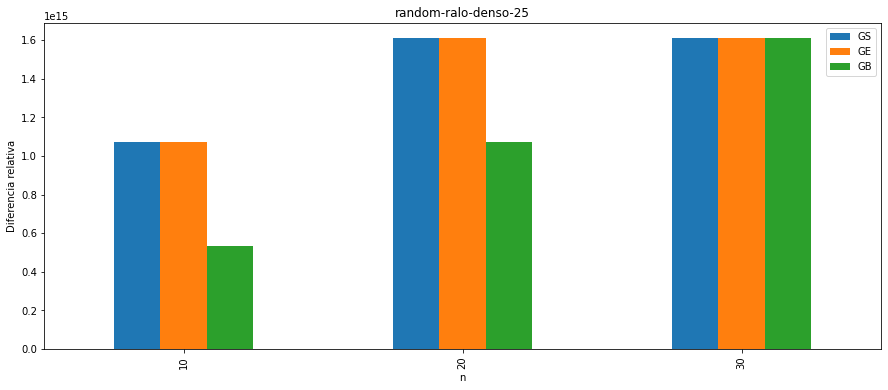

<Figure size 1440x1440 with 0 Axes>

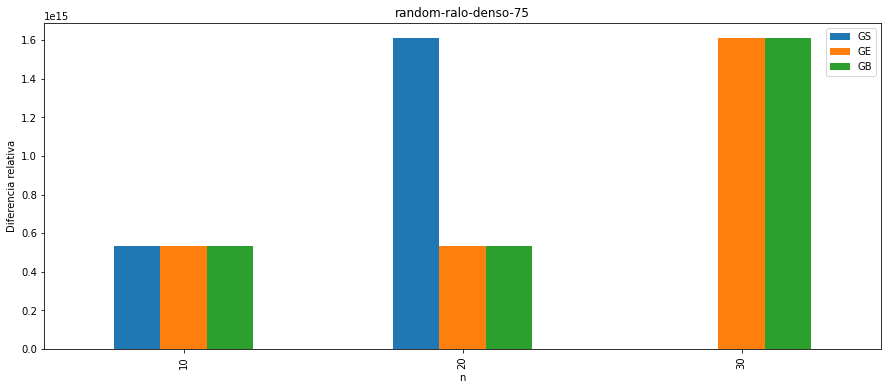

<Figure size 1440x1440 with 0 Axes>

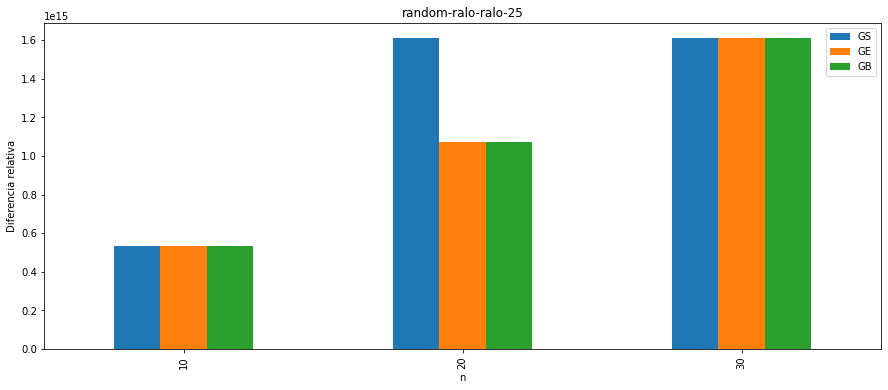

<Figure size 1440x1440 with 0 Axes>

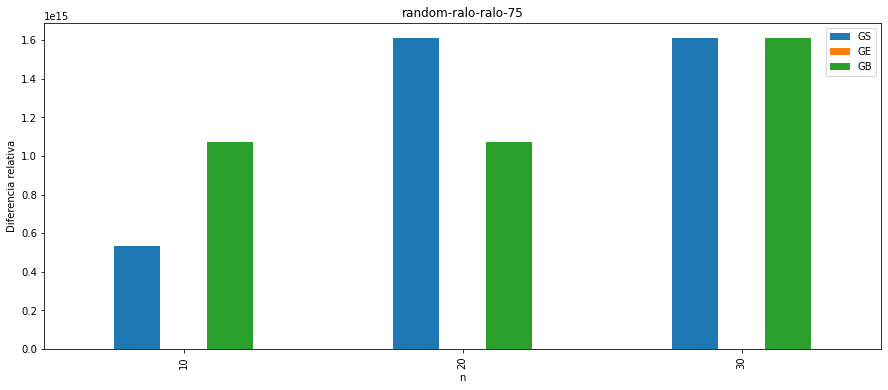

In [217]:
df = pd.DataFrame()
for dataset in datasets: 
    plotdata = dataplot(df_datasets[dataset],"tiempo_mejor_solucion")
    ax = plotdata.plot(kind="bar", figsize=(15,6))
    ax.set_title(dataset)
    ax.set_xlabel('n')
    ax.set_ylabel('Diferencia relativa')
    plt.savefig("..\\graficos\\" + dataset + "-relativo.svg");
    prom = promedioRelativo(df_datasets[dataset],"tiempo_mejor_solucion")
    #print(prom.to_latex(index=False))
    df = df.append(prom)

<Figure size 1440x1440 with 0 Axes>

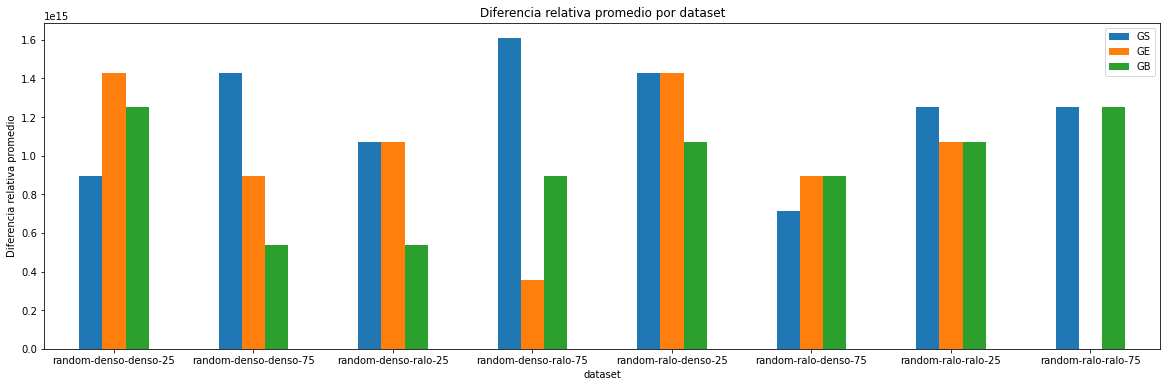

In [218]:
plotdata = dataplotDiffs(df,"tiempo_mejor_solucion")
ax = plotdata.plot(kind="bar", figsize=(20,6), rot=0)
ax.set_title("Diferencia relativa promedio por dataset")
ax.set_xlabel('dataset')
ax.set_ylabel('Diferencia relativa promedio')
plt.savefig("..\\graficos\\" + "diff-promedios" + "-relativo.svg");